video link-https://drive.google.com/drive/folders/1fe4h824_b2xk0GXgKL9VVEoGpgKfNNXW?dmr=1&ec=wgc-drive-hero-goto

Source-chat gpt and geeks for geek for some libraries like sklearn
https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

Question 1.

n is sample size and s is generator matrix for of m *d

In [ ]:
def matrix_generator(n, s):

    m, d = s.shape
    random_matrix = np.random.randn(n, m)
    x = np.dot(random_matrix, s)
    return x
#example for  the function generator
n = 10
s = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x = matrix_generator(n, s)
print(x.shape)
print(x)


(10, 3)
[[ -7.68252756  -8.59026379  -9.49800002]
 [  6.63997885   9.03394753  11.42791621]
 [ -3.35650323  -6.31041532  -9.26432741]
 [ -2.22578862  -2.59913337  -2.97247811]
 [  4.82995872   5.73896502   6.64797131]
 [ -8.49735891  -8.77393965  -9.05052039]
 [ -7.78640642  -9.05553439 -10.32466236]
 [ 17.91432841  21.73465847  25.55498853]
 [ -1.91386328  -2.30267362  -2.69148397]
 [ -0.86344273  -1.17439189  -1.48534105]]


**Question 2.**

In [ ]:
def target_generator(x,w,var):
    n,d=x.shape
    weight=w[:-1]
    bias=w[-1]

    mul=np.dot(x,weight)
    target=mul+bias
    noise=np.random.normal(0,var,n)

    target=target+noise
    return target


[18.90682333 25.02822178 54.85913367]


In [ ]:
#example for the function generated
x1=np.array([[1,2,3],[2,3,4],[6,7,10]])
w1=np.array([1,2,3,5])
var=0.1
target=target_generator(x1,w1,var)
print(target)

[19.00139107 25.08391401 55.07117409]


**Question 3.**

Used geeks for geek to know about pinv -https://www.geeksforgeeks.org/differenece-between-inv-and-pinv-functions-in-matlab/
also used chat gpt

In [ ]:
def piv_time_measure(n_values,d):
   time1=[]
   for n in n_values:
      x=np.random.randn(n,d)
      start_time=time.time()
      np.linalg.pinv(x)
      end_time=time.time()
      time1.append(end_time-start_time)
   return time1


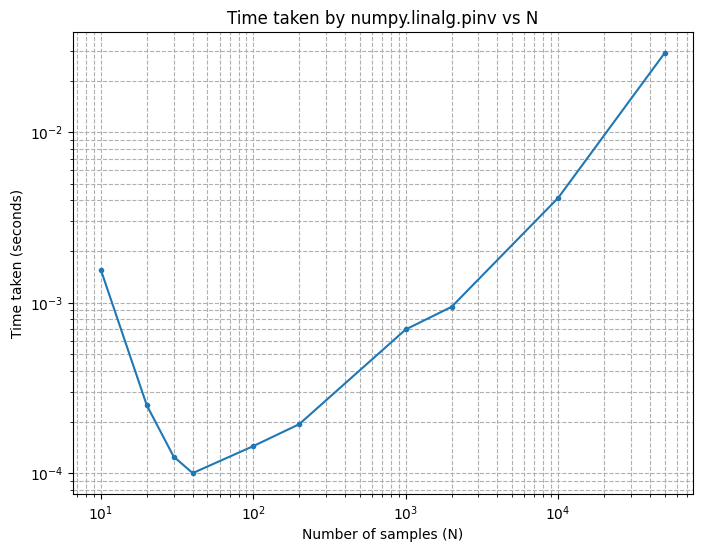

In [201]:
d=10

n_values = np.array([10,20,30,40,100,200,1000,2000,10000,50000])
time1=piv_time_measure(n_values,d)

n_log=np.log(n_values)
time_log=np.log(time1)



# Plotting the results on a log-log scale
plt.figure(figsize=(8, 6))
plt.loglog(n_values, time1, marker='.')
plt.xlabel('Number of samples (N)')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken by numpy.linalg.pinv vs N')
plt.grid(True, which="both", ls="--")
plt.show()



**Question 4.**

In [ ]:
def nrmse(t,y):
    #to ensure that t and y are np array or  not
     t = np.array(t)
     y = np.array(y)
     x= np.sqrt(np.mean((t-y)**2))
     range =np.max(t)-np.min(t)
     if range==0:
       return float('inf')
     x=x/range
     return x


In [ ]:
t = np.array([3, -0.5, 2, 7])
y = np.array([2.5, 0.0, 2, 8])

nrmse_value = nrmse(t, y)
print(f"Normalized Root Mean Squared Error (NRMSE): {nrmse_value}")

Normalized Root Mean Squared Error (NRMSE): 0.0816496580927726


**Question 5.**

In [ ]:
def gradient_mse(x,w,t):
    n=x.shape[0]
    y_pred=np.dot(x,w)
    grad=(-2/n)*np.dot(x.T,(t-y_pred))
    return grad



In [ ]:
x=np.array([[1,2,3],[2,10,4],[6,7,10]])
w=[0,9,8]
t=[1,5,3]
grad=gradient_mse(x,w,t)
print(grad)

[ 743.33333333 1488.         1327.33333333]


**Question 6.**

In [ ]:
def l2_gradient(w):
    w = np.array(w)
    gradient = 2 * w
    return gradient

w = np.random.rand(5, 1)
grad = l2_gradient(w)
print("Gradient of L2 norm squared with respect to weights:", grad)

Gradient of L2 norm squared with respect to weights: [[0.65468541]
 [1.91674167]
 [1.67497229]
 [1.17689062]
 [0.62487188]]


**for l2 regularization we use lamda*(weight) square so gradient will be 2 x weight**

**Question 7.**

In [ ]:
def l1_gradient(w):
    w = np.array(w)
    gradient =  np.sign(w)
    return gradient

w = np.random.rand(5, 1)
grad = l1_gradient(w)
print("Gradient of L1 norm squared with respect to weights:", grad)

Gradient of L1 norm squared with respect to weights: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


**Question 8.**


Here we are going to minimize cost to certain level by manupulating weight and fixing learning rate and tolerance of the model

In [179]:
def gradient_descent(X, w, target, lamda1, lamda2, alpha, max_iterations, tol):
    m, n = X.shape
    w = np.zeros(n)
    cost_history = []

    target = target.flatten()

    for i in range(max_iterations):
        y_pred = np.dot(X, w)
        mse = (1 / (2 * m)) * np.sum((y_pred - target) ** 2)
        l1_norm = lamda1 * np.sum(np.abs(w))
        l2_norm = lamda2 * np.sum(w ** 2)

        cost = mse + l1_norm + l2_norm
        cost_history.append(cost)

        # Gradients
        grad_mse = (1 / m) * np.dot(X.T, (y_pred - target))
        grad_l1 = np.sign(w)
        grad_l2 = 2 * w

        # Combined gradient
        grad_desc = grad_mse + lamda1 * grad_l1 + lamda2 * grad_l2
        w -= alpha * grad_desc

        if i > 0 and np.abs(cost_history[-1] - cost_history[-2]) < tol:
            break

    return w, cost_history


In [ ]:

x = np.array([[1, 2, 3], [2, 10, 4], [6, 7, 10]])
target = np.array([1, 5, 3])
lamda1 = 0.1
lamda2 = 0.1
alpha = 0.01
max_iterations = 1000
tol = 1e-6

w, cost_history = gradient_descent(x, np.zeros(x.shape[1]), target, lamda1, lamda2, alpha, max_iterations, tol)

print("Final weights:", w)
print("Cost history:", cost_history)
print("Number of iterations:", len(cost_history))
print("Final cost:", cost_history[-1])


Final weights: [-0.03228457  0.50334657 -0.02211407]
Cost history: [5.833333333333333, 0.7104970370370369, 0.5981735468342387, 0.5069810652518627, 0.4316244817375424, 0.36935196664828523, 0.31789073226041065, 0.27536279636751304, 0.24021640011013223, 0.21116933983383884, 0.1871621427508254, 0.16731937644091993, 0.15102247965883975, 0.13904772485380104, 0.12915363344039874, 0.12095764540453485, 0.11416491190705026, 0.10853181461904893, 0.10385705310982195, 0.0999742938177499, 0.0967460959742822, 0.0941036679718861, 0.09280575078162422, 0.09180061049778998, 0.0909700934711642, 0.090283823707398, 0.08971674418642632, 0.08924815056005146, 0.08886093502416353, 0.08854096156431597, 0.08827654972718896, 0.08805804806593245, 0.08787748168216898, 0.08772826099335171, 0.08760494109004272, 0.08750302289515467, 0.08741878886375072, 0.08734916722337399, 0.08729161979714349, 0.08724404931305918, 0.0872047228145759, 0.0871722083754996, 0.08714532280811674, 0.08712308845492607, 0.08710469748606366, 0.

**Question 9.**

Here we are defing our target and data matrix on which we are running our model using train test split for the validation of the model  and seeing relation betwen noise and average nmrse

used gfg to learn test test split library https://www.geeksforgeeks.org/how-to-do-train-test-split-using-sklearn-in-python/and also took help from chat gpt

In [ ]:
def nrmse_noise_variance(sigma_values, alpha=0.01, runs=5):
    nrmse_results = []

    for sigma in sigma_values:
        nrmse_list = []
        for _ in range(runs):
            np.random.seed()
            m, n = 100, 10
            X = np.random.randn(m, n)
            w = np.random.randn(n)
            noise = np.random.normal(0, sigma, m)
            t = X.dot(w) + noise

            X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.3, random_state=None)

            weight, cost = gradient_descent(X_train, w, t_train, 0.1, 0.1, 0.01, 1000, 1e-6)

            t_pred = X_val.dot(weight)

            nrmse_val = nrmse(t_val, t_pred)
            nrmse_list.append(nrmse_val)

        avg_nrmse = np.mean(nrmse_list)
        nrmse_results.append(avg_nrmse)

    return nrmse_results




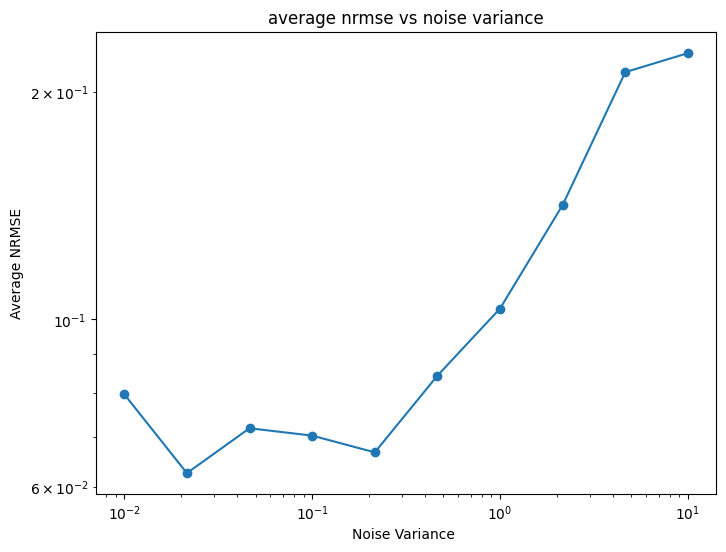

In [202]:
sigma_values = np.logspace(-2, 1, 10)

avg_nrmse_results = nrmse_noise_variance(sigma_values,0.01,5)

plt.figure(figsize=(8, 6))
plt.plot(sigma_values, avg_nrmse_results, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Noise Variance ')
plt.ylabel('Average NRMSE')
plt.title('average nrmse vs noise variance')
plt.grid(False)
plt.show()

**Results-With increasing noise our average nmrse is also increasing ,this is happening due to as we are adding more noise our target is getting far from the actual value so it will require more tolerance than the less noise model**




**Question-10**

In [204]:
def nrmse_n_and_lamda2(sigma, n_list, lamda2_list):
    nrmse_results = np.zeros((len(n_list), len(lamda2_list)))

    for i, n in enumerate(n_list):
        for j, lamda2 in enumerate(lamda2_list):
            m = 100
            X = np.random.randn(m, n)
            w = np.random.randn(n)
            noise = np.random.normal(0, sigma, m)
            t = X.dot(w) + noise

            X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.3, random_state=None)

            weight, cost = gradient_descent(X_train, w, t_train, 0.01, lamda2, 0.01, 1000, 1e-6)

            t_pred = X_val.dot(weight)

            nrmse_val = nrmse(t_val, t_pred)

            nrmse_results[i, j] = nrmse_val

    return nrmse_results


[[0.011362   0.15499884 0.22462021 0.2764861 ]
 [0.04099487 0.20607828 0.19678878 0.2178689 ]
 [0.12612957 0.21950187 0.21685434 0.20944884]
 [0.20379822 0.20734607 0.25079368 0.24776099]
 [0.17889993 0.22649761 0.22294275 0.29723735]]


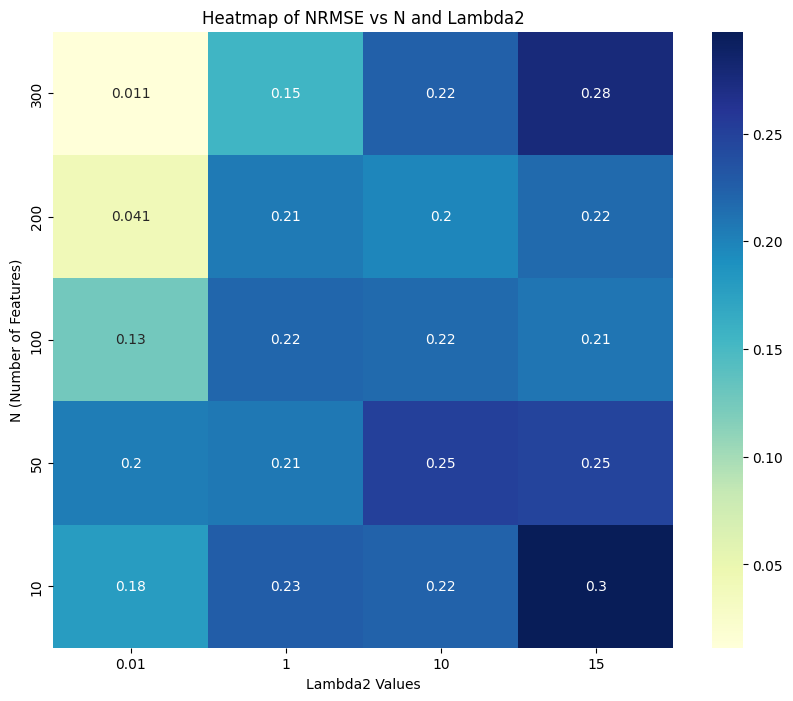

In [229]:
n_list = [10, 50, 100, 200,300]
lamda2_list = [0.01,1, 10, 15]


avg_nrmse_results = nrmse_n_and_lamda2(0.01, n_list, lamda2_list)
print(avg_nrmse_results)
# Plotting the results as a heatmap for better visualization
n_list = [300,200,100,50,10]

plt.figure(figsize=(10, 8))
sns.heatmap(avg_nrmse_results, annot=True, xticklabels=lamda2_list, yticklabels=n_list, cmap="YlGnBu")
plt.xlabel('Lambda2 Values')
plt.ylabel('N (Number of Features)')
plt.title('Heatmap of NRMSE vs N and Lambda2')
plt.show()

**Results-With increasing lamda and decreasing features average nrmse is increasing and for increasing samples on constant lamda nmrse is decreasing this could be due to more features means more accurate prediction so nmrse will reduce**

to plot heat map used chat gpt

**Question 11.**

[[ 1  2  3]
 [ 2 10  4]
 [ 6  7 10]]
[-0.55809826 -0.15233458  0.79677674  0.20918636 -0.48133555  0.45400679
 -1.30599226  1.86123089 -0.53090177 -1.05040393]
Results for uncorrelated features:


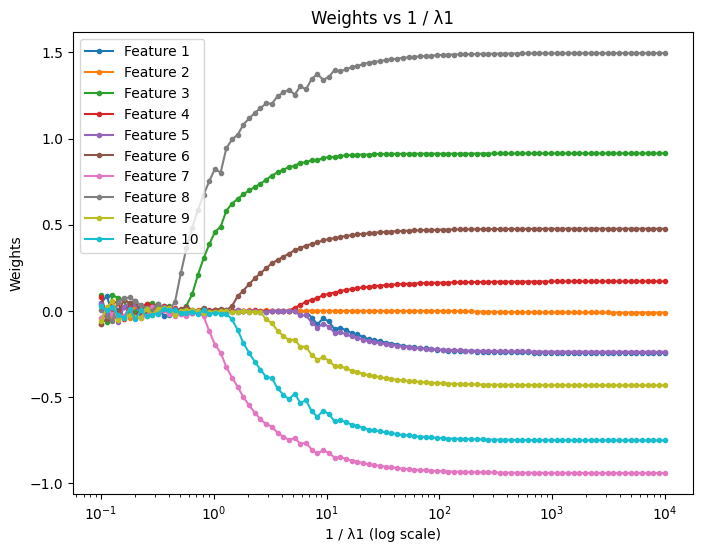

Results for correlated features:


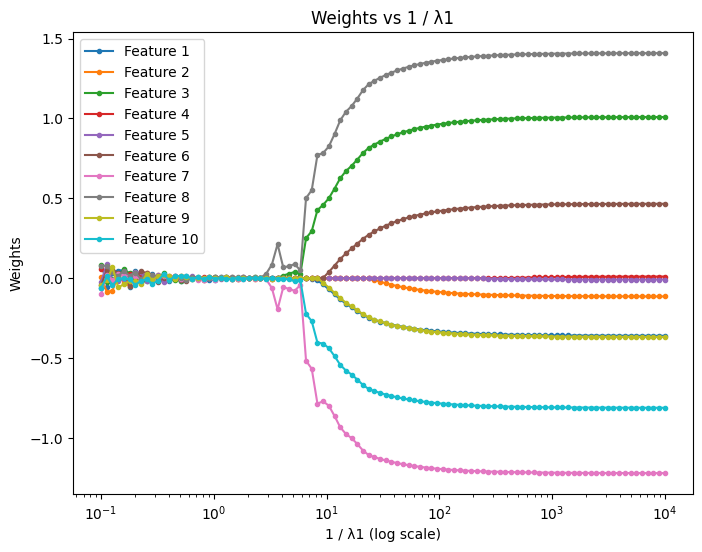

In [200]:
def lasso_variable_elimination(X, t, lamda1_values, correlated=False):
    if correlated:
        correlation_strength = 0.8
        X[:, 1:] = correlation_strength * X[:, 0:1] + (1 - correlation_strength) * X[:, 1:]

    weights_list = []

    for lamda1 in lamda1_values:
        coeff,cost = gradient_descent(X, np.zeros(X.shape[1]), t, lamda1, 0.1, 0.01, 1000, 1e-6)
        weights_list.append(coeff)

    weights_list = np.array(weights_list)

    plt.figure(figsize=(8, 6))
    for i in range(weights_list.shape[1]):
        plt.plot(1 / lamda1_values, weights_list[:, i],marker='.', label=f'Feature {i+1}')
    plt.xscale('log')
    plt.xlabel('1 / λ1 (log scale)')
    plt.ylabel('Weights')
    plt.title('Weights vs 1 / λ1')
   # plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

n_samples, n_features = 50, 10
g = np.identity(n_features)
X = matrix_generator(n_samples, g)
print(x)

w_true = np.random.randn(n_features)
print(w_true)
t = X.dot(w_true) + np.random.randn(n_samples) * 0.5

lamda1_values = np.logspace(-4, 1, 100)

print("Results for uncorrelated features:")
lasso_variable_elimination(X, t, lamda1_values, correlated=False)

print("Results for correlated features:")
lasso_variable_elimination(X, t, lamda1_values, correlated=True)

** as lamda1 increases, we can see a more drastic reduction in weights, especially for correlated features. The selected feature's weight may stabilize while others drop to zero**

To undrestand correlated data used chat gpt and and gfg -https://www.geeksforgeeks.org/program-find-correlation-coefficient/

**Question 12.**

In [ ]:
def correlated_data_generator(N, D, correlation_strength=0.8, sigma=0.1):
    X = np.random.randn(N, D)

    for i in range(1, D):
        X[:, i] = X[:, 0] * correlation_strength + np.random.randn(N) * (1 - correlation_strength)

    w_true = np.random.randn(D, 1)
    noise = np.random.normal(0, sigma, size=(N, 1))
    t = np.dot(X, w_true) + noise
    return X, t


In [ ]:
def grouping_effect(X, t, lamda1_values, lamda2=0.1):
    weights = []

    for lamda1 in lamda1_values:
        w = np.random.randn(X.shape[1])
        coeff, _ = gradient_descent(X, w, t, lamda1, lamda2, 0.01, 1000, 1e-6)
        weights.append(coeff)

    weights = np.array(weights)

    # Plotting
    plt.figure(figsize=(10, 6))
    for i in range(weights.shape[1]):
        plt.plot(1/lamda1_values, weights[:, i], marker='.', label=f'Weight {i+1}')

    plt.xscale('log')
    plt.xlabel('1/λ1')
    plt.ylabel('Weights')
    plt.title('Grouping Effect of Elastic Net on Correlated Features')
    plt.legend()
    plt.grid(True)
    plt.show()

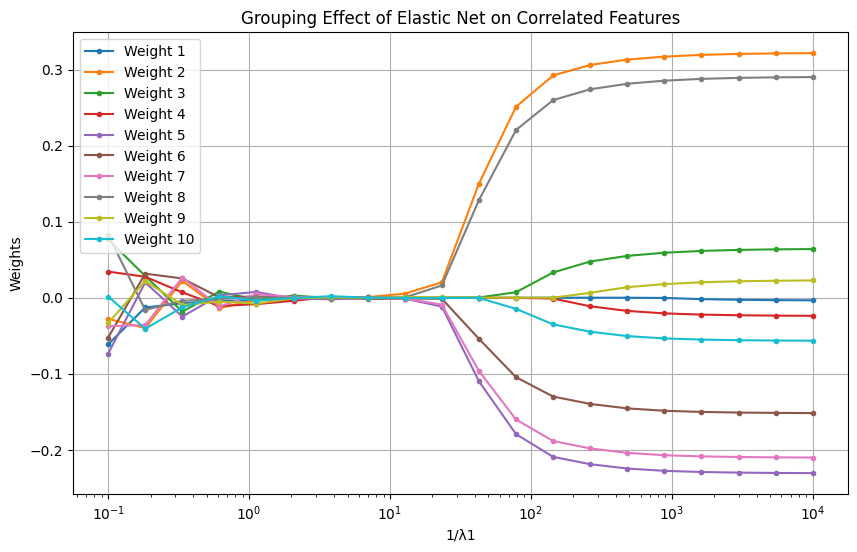

In [ ]:
n_samples, n_features = 100, 10
lambda1_values = np.logspace(-4, 1, 20)

X_corr, t_corr = correlated_data_generator(n_samples, n_features)

grouping_effect(X_corr, t_corr, lambda1_values)

**Question 13.**

In [ ]:
def binary_classification(X, w, bias=0.5, sigma=0.1):
    z = np.dot(X, w) + bias
    p = 1 / (1 + np.exp(-z))
    y = np.random.binomial(1, p, size=len(p))
    noise = np.random.normal(0, sigma, size=len(y))
    t = y + noise
    t = t.astype(int)
    return t

In [ ]:
n_samples = 100
n_features = 5
sigma = 0.1

X = np.random.randn(n_samples, n_features)
w_true = np.random.randn(n_features)

t = binary_classification(X, w_true, bias=0.5, sigma=sigma)

print(t)

[0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0]


**Question 14.**

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_gradient(x, y, w, bias=0.5):
    z = np.dot(x, w) + bias
    y_hat = sigmoid(z)

    gradient = np.dot(x.T, (y_hat - y)) / len(y)
    return gradient

In [ ]:

n, d = 100, 10
x = np.random.randn(n, d)
y = np.random.randint(0, 2, n)
w = np.random.randn(d)
bias = 0.5

gradient = binary_cross_entropy_gradient(x, y, w, bias)

print("Computed gradient:", gradient)

Computed gradient: [ 0.09935728  0.13865358  0.10363964  0.1684931   0.04114315 -0.22673645
  0.03161041  0.10864819 -0.01840658 -0.11664175]


**Question. 15**

In [209]:
def binary_classification_data(N, D, bias=0.5, sigma=0.1):
    G = np.random.randn(D)
    X = np.random.randn(N, D)
    linear_combination = np.dot(X, G) + bias
    probabilities = 1 / (1 + np.exp(-linear_combination))
    y = np.random.binomial(1, probabilities)
    noise = np.random.normal(0, sigma, size=y.shape)
    t = y + noise
    return X, t

In [210]:
def gradient_descent1(X, y, w, bias, lambda2, alpha, max_iterations, tol):
    m = len(y)
    for i in range(max_iterations):
        z = np.dot(X, w) + bias
        y_hat = sigmoid(z)
        gradient = np.dot(X.T, (y_hat - y)) / m + lambda2 * w
        w -= alpha * gradient
        if np.linalg.norm(gradient) < tol:
            break
    return w


In [211]:
def nrmse_binary_classification(n_list, lambda2_list, sigma=0.1, runs=5):
    nrmse_results = np.zeros((len(n_list), len(lambda2_list)))

    for i, N in enumerate(n_list):
        for j, lambda2 in enumerate(lambda2_list):
            nrmse_run_results = []
            for _ in range(runs):
                X, y = binary_classification_data(N, 10, 0.5, sigma)
                w = np.random.randn(X.shape[1])
                bias = 0.5
                w_final = gradient_descent1(X, y, w, bias, lambda2, 0.01, 1000, 1e-6)
                y_pred = sigmoid(np.dot(X, w_final) + bias)
                nrmse_value = nrmse(y, y_pred)
                nrmse_run_results.append(nrmse_value)

            nrmse_results[i, j] = np.mean(nrmse_run_results)

    return nrmse_results



[[0.33522128 0.35654593 0.41515313 0.38911854]
 [0.31804387 0.36547721 0.36839011 0.35868564]
 [0.31006016 0.3371758  0.34937764 0.34969702]
 [0.30795408 0.32781326 0.33577003 0.34624765]
 [0.30320085 0.31578169 0.34015335 0.33383068]]


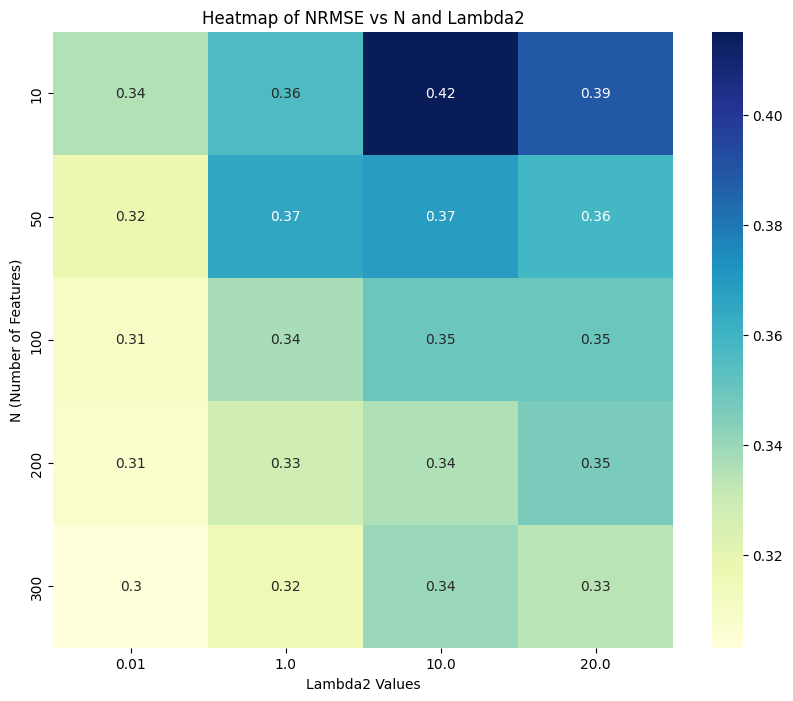

In [223]:
n_list1 = np.array([10, 50, 100, 200, 300])

lamda2_list1 = np.array([0.01,1, 10, 20])


avg_nrmse_results = nrmse_binary_classification(n_list1, lambda2_list1, 0.1, 5)
print(avg_nrmse_results)
#n_list = np.array([300,200,100,50,10])
plt.figure(figsize=(10, 8))
sns.heatmap(avg_nrmse_results, annot=True, xticklabels=lamda2_list1, yticklabels=n_list1, cmap="YlGnBu")
plt.xlabel('Lambda2 Values')
plt.ylabel('N (Number of Features)')
plt.title('Heatmap of NRMSE vs N and Lambda2')
plt.show()

**Results-With increasing lamda and decreasing features average nrmse is increasing and for increasing samples on constant lamda nmrse is decreasing this could be due to more features means more accurate prediction so nmrse will reduce but nrmse values are more than the nrmse values for linear regression **